# Ensemble Methods
Ensemble methods in machine learning involve combining multiple models to enhance the performance of a predictive model. This approach is based on the principle that a group of diverse models, when combined, can often predict more accurately than a single model. Ensemble methods are particularly effective because they can reduce overfitting (by averaging out errors) and underfitting (by strengthening weak predictions). They are widely used in various fields such as finance, healthcare, and image processing due to their improved accuracy and robustness compared to single-model approaches.

In this jupyter notebook, we will consider two ensemble methods: 

1. **Bagging**

2. **Random Forests**

## 1. Dataset 
In this analysis, we used a dataset 'palmer penguins' that is publicly available on Kaggle, originally collected and provided by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, part of the Long Term Ecological Research Network. For our study, we selected 'Sex' as the dependent variable (y) and two features: 'culmen_length_mm' and 'culmen_depth_mm'.

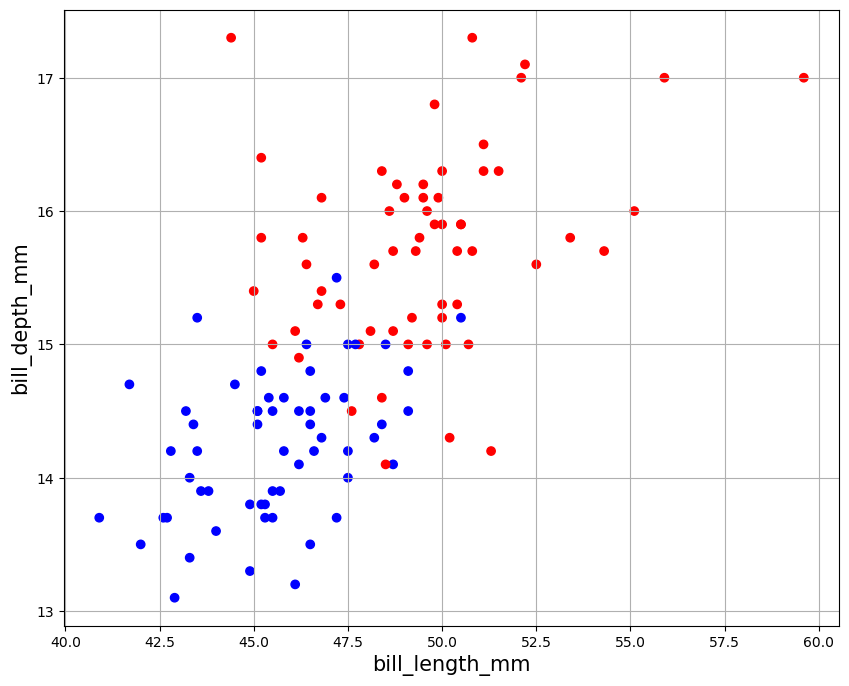

In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
data= pd.read_csv("palmer_penguins.csv")
data=data.dropna()
data=data[(data['species']=='Gentoo')]
y = data.sex.values
y = np.where(y == 'Female', 0, 1)
X = data[['bill_length_mm','bill_depth_mm']].to_numpy()
x=X
colors = ["red" if label == 1 else "blue" for label in y]
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c = colors)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.grid(True)
plt.show()

## 2. Bagging
Bagging, short for Bootstrap Aggregating, is a powerful ensemble technique in machine learning used to improve the stability and accuracy of machine learning algorithms, particularly those with high variance like decision trees. It works by creating multiple subsets of the original training data through bootstrap sampling (random sampling with replacement), then training the same model separately on each subset. The final prediction is made by averaging the predictions from all models in case of regression, or by majority voting in classification. This process reduces the risk of overfitting and leads to a more robust model. Bagging is parallelizable, which means models can be trained simultaneously, offering computational efficiency. A well-known example of bagging is the **Random Forest algorithm**.

First let we learn about the basic idea about Bagging.

### 2.1 Concept of Bagging
* **Objective**: To reduce variance and prevent overfitting.
* **Core Idea**: Multiple learners (models) are trained on different subsets of the same training data and then aggregated to form a final model.
### 2.2 Idea
* **Bootstrap Sampling**: Random subsets of the training data are created using sampling with replacement, known as bootstrap samples.
* **Training Multiple Models**: Each subset is used to train a separate instance of the same model type (e.g., decision trees).
* **Aggregation**: The predictions from all models are combined. This is typically done by averaging for regression problems or majority voting for classification.

#### Steps
1. **Data Preparation**: Divide the dataset into multiple bootstrap samples.
2. **Model Training**: Train the same model separately on each bootstrap sample.
3. **Combining Models**: Use averaging or voting to combine the outputs of the individual models.

### 2.2 Advantages and Disadvantages
#### Advantages
* Robustness: More robust than a single learner, especially for complex models prone to overfitting.
* Parallelizable: Models can be trained in parallel, offering computational efficiency.
#### Disadvantages
* Complexity: Can increase computational cost and time.
* Interpretability: Loses some interpretability compared to a single model, especially with a large number of learners.

### 2.3 Implementation
In this section, we will use scikit-learn to implement the Bagging method and compare its results with those of the Decision Tree. The following section demonstrates how to apply the Bagging method to our dataset."

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a decision tree classifier
tree = DecisionTreeClassifier(random_state=1)

# Create a bagging classifier with the decision tree
bagging_clf = BaggingClassifier(tree,n_estimators=100, random_state=40)

# Train the classifier
bagging_clf.fit(X_train, y_train)

# Make predictions
predictions = bagging_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Bagging Classification Report")
print(classification_report(y_test, predictions), "\n")


Bagging Classification Report
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.76      0.94      0.84        17

    accuracy                           0.83        36
   macro avg       0.85      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36
 



Text(0.5, 1.0, 'Confusion matrix for Bagging')

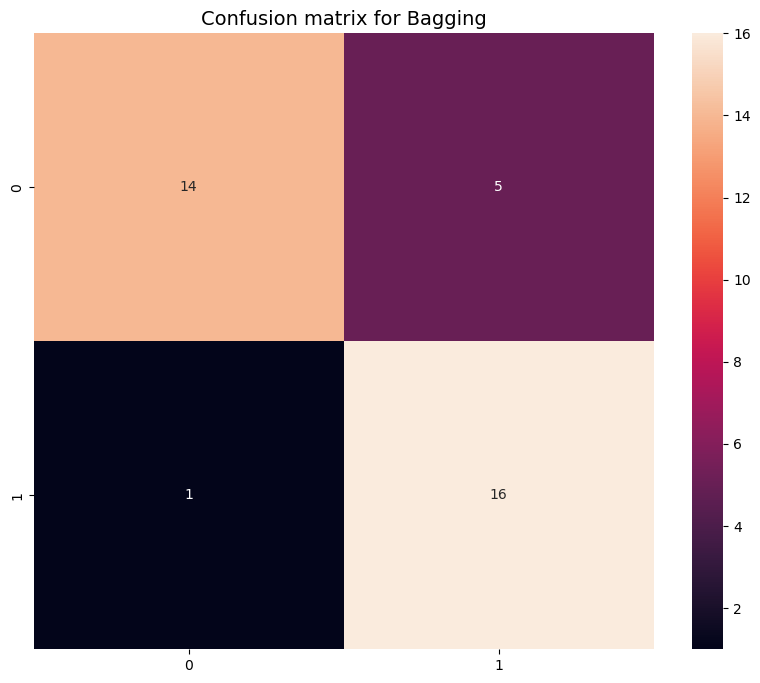

In [81]:
fig = plt.figure(figsize = (10,8))
confusion_matrix_ = confusion_matrix(y_test, predictions)
sns.heatmap(confusion_matrix_,annot=True)
plt.title('Confusion matrix for Bagging',fontsize=14)

Next, we will proceed to compare the performance of the Bagging method with that of the Decision Tree.

In [76]:
# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.75      0.88      0.81        17

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36
 



Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

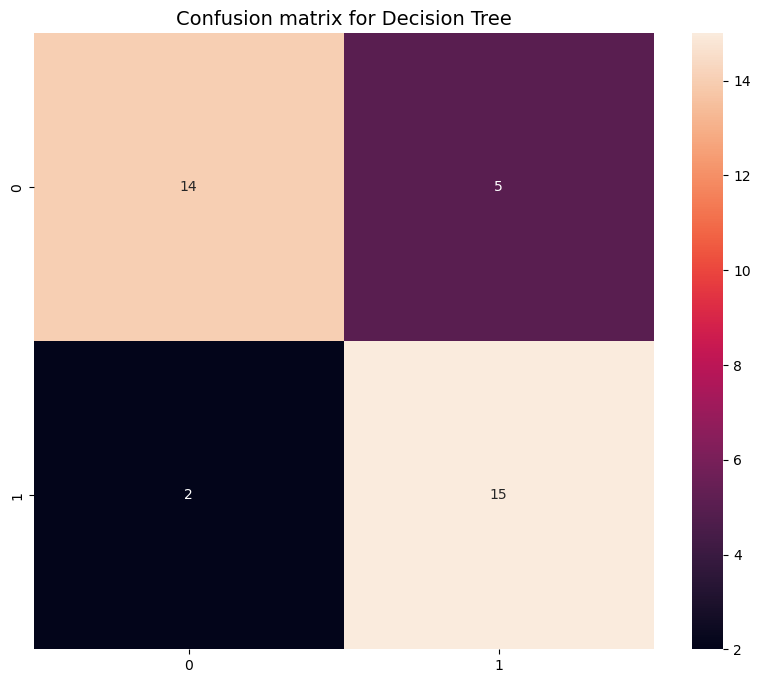

In [87]:
fig = plt.figure(figsize = (10,8))
confusion_matrix_ = confusion_matrix(y_test, tree_y_pred)
sns.heatmap(confusion_matrix_,annot=True)
plt.title('Confusion matrix for Decision Tree',fontsize=14)

The reports above indicate that the Bagging Classifier demonstrates higher precision compared to the Decision Tree. 

Next, we will visualize the decision regions of the two models.

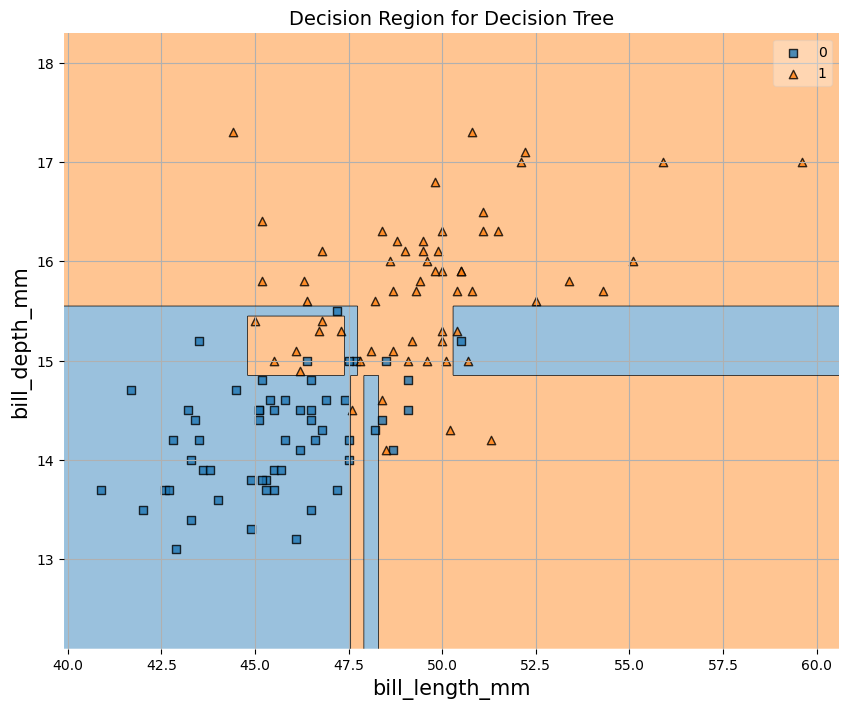

In [88]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.title('Decision Region for Decision Tree',fontsize=14)
plt.grid()
plt.show()

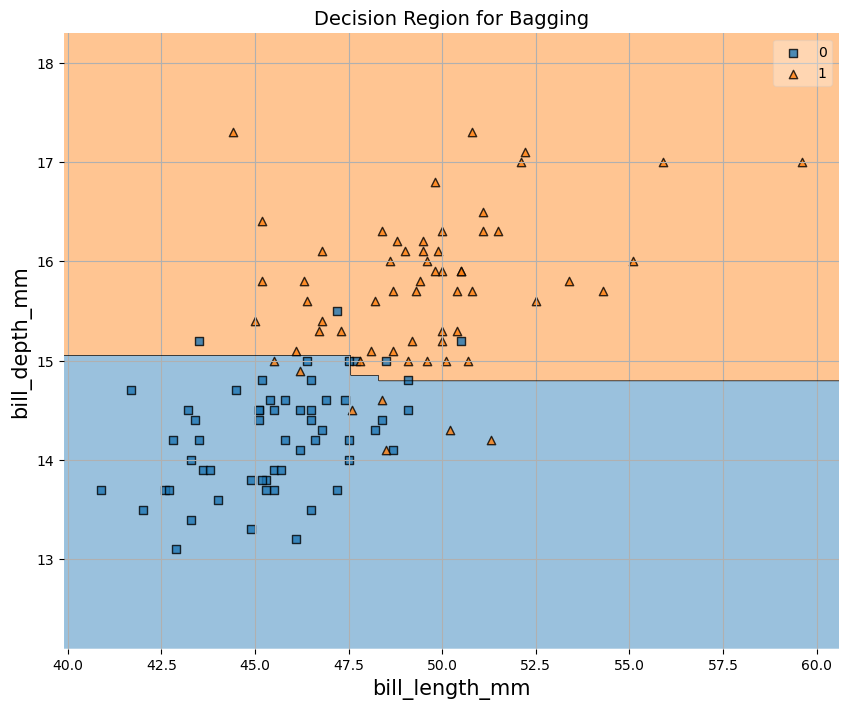

In [89]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bagging_clf)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.title('Decision Region for Bagging',fontsize=14)
plt.grid()

### 2.4 Comparison
Based on the results above, we compared the Decision Tree with Bagging method in following aspects:
1. **Performance**:
   - **Bagging**: Typically exhibits better performance than a single Decision Tree, especially on complex datasets. By averaging multiple trees, it often achieves higher accuracy which we showed in our report.
   - **Decision Tree**: Can perform well on simpler datasets but is generally more prone to overfitting, especially if the tree is deep and complex.
   - In our application, the accuracy of the Bagging method is 0.98 for Female and 0.76 for Male, whereas the Decision Tree yields an accuracy of 0.88 for Female and 0.75 for Male.

2. **Variance and Bias**:
   - **Bagging**: Aims to reduce variance without increasing bias significantly. By combining multiple trees, it averages out their individual variances, leading to a more stable and robust model.
   - **Decision Tree**: Has high variance and low bias, meaning it can capture a lot of detail from the training data but may not generalize well to unseen data.

3. **Overfitting**:
   - **Bagging**: Helps in reducing the risk of overfitting compared to a single Decision Tree. The ensemble's averaging effect makes it less sensitive to noise in the training data.
   - **Decision Tree**: Prone to overfitting, particularly when they are not pruned properly or when the dataset has many features.
   - From the decision region plots, we can find that the Decision Tree is overfitting.

4. **Computational Complexity**:
   - **Bagging**: More computationally expensive than a single Decision Tree because it involves training multiple trees. However, the process can be parallelized, which is an advantage in systems with multi-core processors. 
   - **Decision Tree**: Less computationally intensive to train compared to Bagging. It's a straightforward algorithm that can be trained relatively quickly.
   - In our application, the Bagging method required 3.8 seconds to execute, while the Decision Tree completed in just 0.1 seconds.

### 2.5 Conclusion
In summary, while Bagging often outperforms a single Decision Tree in terms of accuracy and robustness, it does so at the cost of increased computational resources and reduced interpretability. The choice between the two should be based on the specific requirements of the task, such as the complexity of the data, need for interpretability, and computational constraints.

## 3. Random Forests
Random Forests is a powerful and versatile machine learning method. It's an ensemble learning technique, primarily used for classification and regression, that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 
Certainly! Random Forests is a powerful and versatile machine learning method. It's an ensemble learning technique, primarily used for classification and regression, that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Here's a breakdown of its key concepts:

### 3.1 Concept
Each tree in the forest makes a prediction, and the most common prediction (in classification) or average (in regression) becomes the output of the forest.

### 3.2 Idea
   * Random Forests use the concept of bagging, which involves creating multiple datasets from the original data by sampling with replacement, and then training a tree on each dataset.
   * In addition to bagging, Random Forests introduce randomness in the **feature selection** process. Each tree in a Random Forest is trained on a random subset of features.

### 3.3 Advantages and Disadvantages
#### Advantages
   - **Reduces Overfitting**: By averaging multiple trees, it avoids overfitting problems common to Decision Trees.
   - **High Accuracy**: Often provides high accuracy on various data sets.
   - **Handles Large Data Sets with Higher Dimensionality**: Works well with large datasets and can handle thousands of input variables without variable deletion.
   - **Handles Missing Values**: Capable of handling missing values in the data.

#### Disadvantages
   - **Complexity**: More complex and computationally intensive than individual decision trees.
   - **Less Interpretability**: While individual trees are easy to understand, a forest is not as interpretable due to the averaging of many trees.
   - **Longer Training Time**: Due to the ensemble of multiple trees, the training time can be long, especially on very large datasets.

### 3.4 Implementation
   Random Forests can also be easily implemented using libraries scikit-learn in Python.

In [108]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

##### Evaluation
Next, we will evaluate the Random Forests classifier using the classification_report, confusion_matrix, and decision region plot.

In [109]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.76      0.94      0.84        17

    accuracy                           0.83        36
   macro avg       0.85      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



Text(0.5, 1.0, 'Confusion matrix for Random Forests')

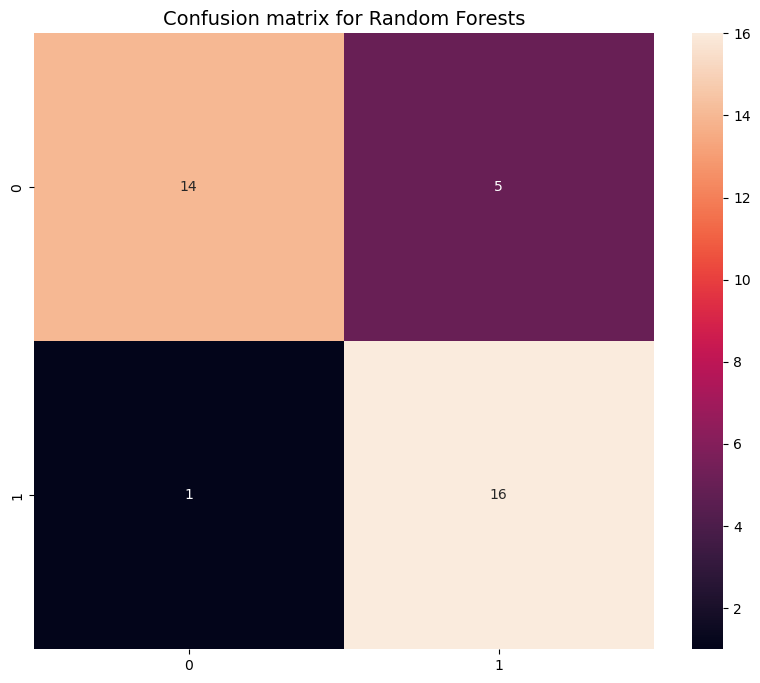

In [93]:
fig = plt.figure(figsize = (10,8))
confusion_matrix_ = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_,annot=True)
plt.title('Confusion matrix for Random Forests',fontsize=14)

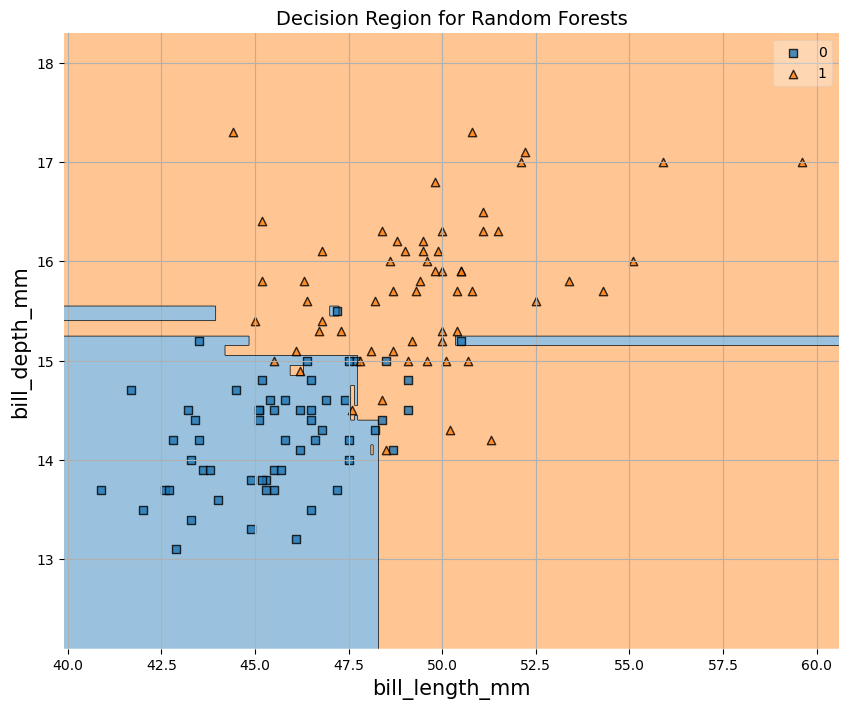

In [95]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = rf_classifier)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.title('Decision Region for Random Forests',fontsize=14)
plt.grid()

### 3.5 Comparision
In this section, we will compare the Decision Tree, Bagging, and Random Forests classifiers. First, let's place the three decision region plots that we have already plotted side by side for convenient comparison.

Text(0.5, 1.0, 'Random Forests')

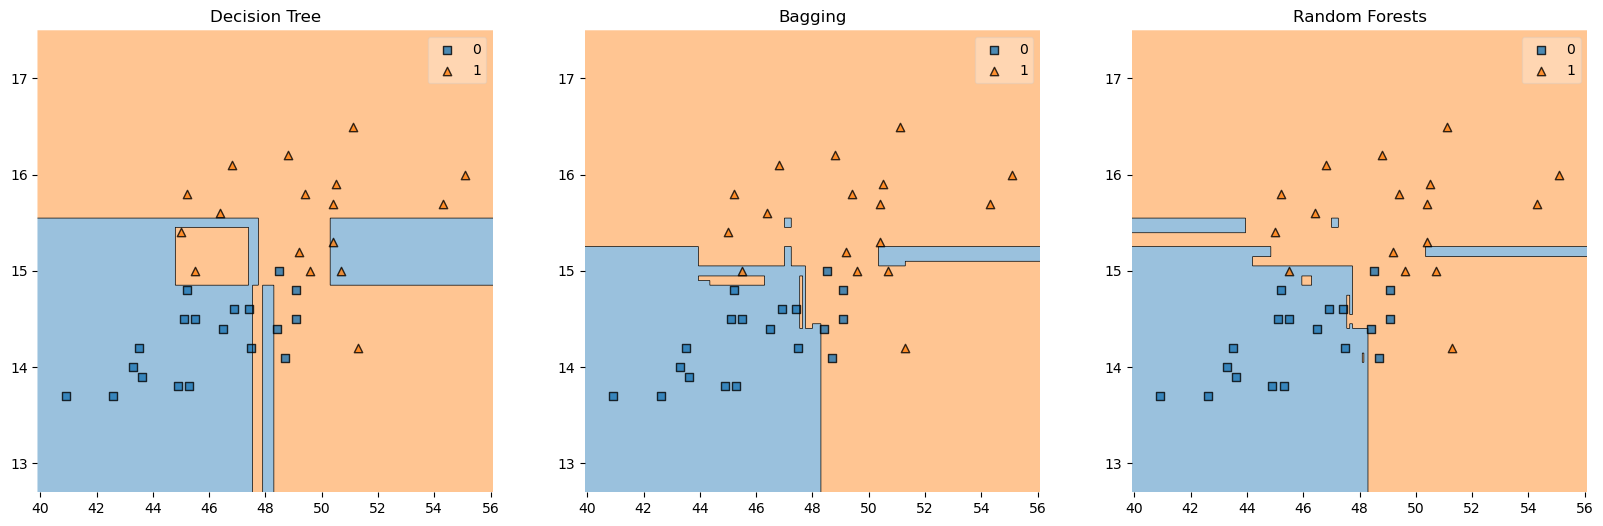

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 

# Plotting decision regions for each classifier
plot_decision_regions(X_test, y_test, clf=tree_clf, ax=axes[0])
axes[0].set_title('Decision Tree')

plot_decision_regions(X_test, y_test, clf=bagging_clf, ax=axes[1])
axes[1].set_title('Bagging')

plot_decision_regions(X_test, y_test, clf=rf_classifier, ax=axes[2])
axes[2].set_title('Random Forests')

#### Implementation on all features
Now, to gain a clearer understanding of the three methods mentioned above, we can implement each of them on all four features bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g in our dataset and then evaluate the results.

In [131]:
X_all = data.iloc[:,3:7].to_numpy()
X_scaler = StandardScaler()
X_all = pd.DataFrame(X_scaler.fit_transform(X_all))
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.3, random_state=1)
tree_clf_all = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf_all.fit(X_train_all, y_train_all)
tree_y_pred_all = tree_clf.predict(X_test_all)
print(f"Tree Classification Report")
print(classification_report(y_test_all, tree_y_pred), "\n")
bagging_clf_all = BaggingClassifier(tree,n_estimators=100, random_state=40)
bagging_clf_all.fit(X_train_all, y_train_all)
predictions_all = bagging_clf_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, predictions_all)
print(f"Bagging Classification Report")
print(classification_report(y_test_all, predictions_all), "\n")
rf_classifier_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_all.fit(X_train_all, y_train_all)
y_pred_all = rf_classifier_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
report_all = classification_report(y_test_all, y_pred_all)
print(f"Random Forests Classification Report")
print(report_all,"\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.93      0.76      0.84        17

    accuracy                           0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.87      0.86      0.86        36
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.93      0.76      0.84        17

    accuracy                           0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.87      0.86      0.86        36
 

Random Forests Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.93      0.76      0.84        17

    accuracy                           0.86        36
   macro avg       0.87      0

The classification reports above indicate that when considering all four features, the accuracy of these three methods is higher than when only two features are used. Additionally, their accuracies are quite similar to each other.

Next, we will compare Decision Tree, Bagging, and Random Forests from four aspects: Complexity, Accuracy, Interpretability, and Overfitting Resistance. 
- **Complexity**: Random Forests > Bagging > Decision Tree
- **Accuracy**: Often, Random Forests > Bagging > Decision Tree (though this can vary depending on the data and specific problem).
- **Interpretability**: Decision Tree > Bagging > Random Forests
- **Overfitting Resistance**: Random Forests > Bagging > Decision Tree

## 4. Conclusion 
It's important to note that the best choice depends on the specific requirements of the task, including the nature of the data, the problem we are solving, and the trade-offs we are willing to make between interpretability and accuracy.

Here are some suggestions based on our implementations:

- **Decision Tree**: Choose when you need a simple, easy-to-interpret model and the data is not very complex.
- **Bagging**: Opt for this when you want to reduce the variance of your model, especially if using high-variance models like Decision Trees.
- **Random Forests**: Best when you require a balance of accuracy and model robustness, especially for complex datasets.